<a href="https://colab.research.google.com/github/RafaelBi/machine_learning/blob/master/Time_of_character_in_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Программа считает количество секунд персонажей в видео

1.   Обучение проходит на видео Tom_and_jerry.mp4
2.   Размеченные данные тренировочого видео'mapping.csv'
3.   Тест проходит на видео 'Tom_and_Jerry_3.mp4'
4.   Выводится результат в





In [0]:
import cv2    
import math  
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np  
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

In [0]:
import os
os.listdir('drive/My Drive')

In [24]:
count = 0
videoFile = 'drive/My Drive/Tom_and_jerry.mp4'
cap = cv2.VideoCapture(videoFile)   # захват видео по заданному пути 
frameRate = cap.get(5) # частота кадров
x=1
while(cap.isOpened()):
    frameId = cap.get(1) # текущий номер кадра 
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;
        count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


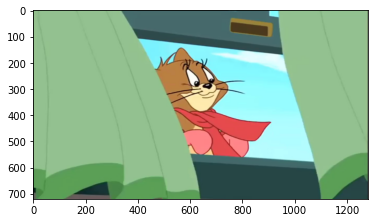

In [25]:
img = plt.imread ('frame0.jpg') # чтение изображения с использованием его имени 
plt.imshow (img)

In [58]:
data = pd.read_csv ('mapping.csv') 
data.head (10) 
#0 - ни Джерри, ни Том
#1 - ДЖЕРРИ
#2 - ТОМ

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2
5,frame5.jpg,2
6,frame6.jpg,2
7,frame7.jpg,2
8,frame8.jpg,2
9,frame9.jpg,2


1                 1                 2                 2                 2                 2                 2                 2                 2                 2                 

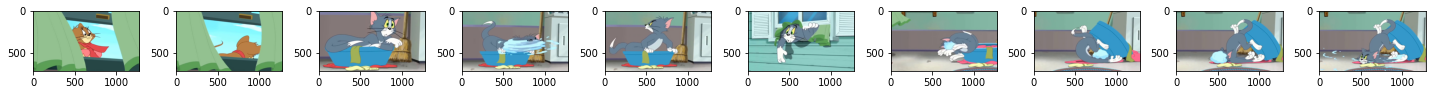

In [66]:
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    img = plt.imread ("frame%d.jpg" % i)
    plt.imshow (img)
    print(data.Class[i], end='                 ')
plt.tight_layout()    

In [0]:
X = [ ]   
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img) 
X = np.array(X) 

In [0]:
y = data.Class
dummy_y = np_utils.to_categorical(y) 

In [0]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)
    image.append(a)
X = np.array(image)

In [0]:
from keras.applications.vgg16 import preprocess_input 
X = preprocess_input (X, mode = 'tf') # предварительная обработка входных данных

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, dummy_y, test_size=0.3, random_state=42)

In [0]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [39]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 3s 0us/step


In [40]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((208, 7, 7, 512), (90, 7, 7, 512))

In [0]:
X_train = X_train.reshape(208, 7*7*512)
X_valid = X_valid.reshape(90, 7*7*512)

In [0]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [0]:
model = Sequential()
model.add(InputLayer((7*7*512,))) 
model.add(Dense(units=1024, activation='sigmoid')) 
model.add(Dense(3, activation='softmax')) 

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Train on 208 samples, validate on 90 samples
Epoch 1/100
208/208 [==============================] - 2s 11ms/step - loss: 1.0082 - accuracy: 0.5865 - val_loss: 0.7194 - val_accuracy: 0.7000
Epoch 2/100
208/208 [==============================] - 2s 10ms/step - loss: 0.4011 - accuracy: 0.8317 - val_loss: 0.5078 - val_accuracy: 0.8000
Epoch 3/100
208/208 [==============================] - 2s 10ms/step - loss: 0.2319 - accuracy: 0.9375 - val_loss: 0.3939 - val_accuracy: 0.8222
Epoch 4/100
208/208 [==============================] - 2s 10ms/step - loss: 0.1418 - accuracy: 0.9808 - val_loss: 0.3716 - val_accuracy: 0.8333
Epoch 5/100
208/208 [==============================] - 2s 10ms/step - loss: 0.0844 - accuracy: 0.9760 - val_loss: 0.3659 - val_accuracy: 0.8333
Epoch 6/100
208/208 [==============================] - 2s 10ms/step - loss: 0.0478 - accuracy: 0.9856 - val_loss: 0.3108 - val_accuracy: 0.8778
Epoch 7/100
208/208 [==============================] - 2s 10ms/step - loss: 0.0367 - accura

In [0]:
test = pd.read_csv('test.csv')

In [0]:
import os
os.listdir('drive/My Drive')

In [50]:
count = 0
videoFile = 'drive/My Drive/Tom_and_Jerry_3.mp4'
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [0]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [0]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)


In [0]:
test_image = preprocess_input(test_image, mode='tf')

test_image = base_model.predict(test_image)

test_image = test_image.reshape(186, 7*7*512)

test_image = test_image/test_image.max()

In [0]:
predictions = model.predict_classes(test_image)

In [78]:
results=test
results['Prediction'] = predictions
results.head(10)

,Image_ID,Prediction
0,test0.jpg,2
1,test1.jpg,2
2,test2.jpg,0
3,test3.jpg,0
4,test4.jpg,2
5,test5.jpg,1
6,test6.jpg,0
7,test7.jpg,0
8,test8.jpg,2
9,test9.jpg,2


2                 2                 0                 0                 2                 1                 0                 0                 2                 2                 

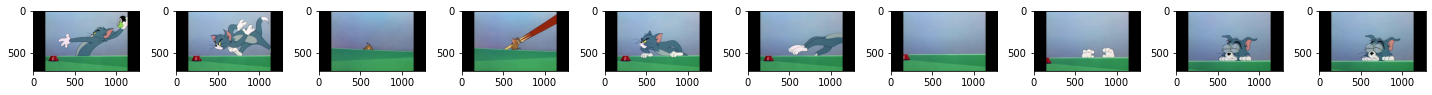

In [76]:
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    img = plt.imread ("test%d.jpg" % i)
    plt.imshow (img)
    print(results.Prediction[i], end='                 ')
plt.tight_layout()    

In [56]:
print("The screen time of JERRY is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of TOM is", predictions[predictions==2].shape[0], "seconds")

The screen time of JERRY is 6 seconds
The screen time of TOM is 116 seconds


In [0]:
results.to_csv('Tom&Jerry_time_in_video.csv', index=False)